# Import Libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
sales = pd.read_csv('Balaji Fast Food Sales.csv')

In [4]:
sales.sample(2)

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
690,691,04-01-2022,Sandwich,Fastfood,60,7,420,Cash,Mrs.,Evening
714,715,04-12-2022,Sandwich,Fastfood,60,1,60,Online,Mr.,Morning


# Data pre-processing 

In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [9]:
sales.isna().sum()

order_id                0
date                    0
item_name               0
item_type               0
item_price              0
quantity                0
transaction_amount      0
transaction_type      107
received_by             0
time_of_sale            0
dtype: int64

In [12]:
sales['transaction_type'].mode()

0    Cash
Name: transaction_type, dtype: object

In [18]:
sales['transaction_type'].fillna(sales['transaction_type'].mode()[0] , inplace=True)

In [19]:
sales.isna().sum()

order_id              0
date                  0
item_name             0
item_type             0
item_price            0
quantity              0
transaction_amount    0
transaction_type      0
received_by           0
time_of_sale          0
dtype: int64

In [21]:
sales.duplicated().sum()

0

In [22]:
sales.describe()

,order_id,item_price,quantity,transaction_amount
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,33.315000,8.162000,275.230000
std,288.819436,14.921744,4.413075,204.402979
min,1.000000,20.000000,1.000000,20.000000
25%,250.750000,20.000000,4.000000,120.000000
50%,500.500000,25.000000,8.000000,240.000000
75%,750.250000,50.000000,12.000000,360.000000
max,1000.000000,60.000000,15.000000,900.000000


# Exploration Data

In [23]:
sales.sample(2)

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
342,343,1/18/2023,Sugarcane juice,Beverages,25,5,125,Cash,Mr.,Afternoon
567,568,12/29/2022,Panipuri,Fastfood,20,12,240,Cash,Mrs.,Afternoon


In [24]:
sales['item_type'].value_counts()

item_type
Fastfood     686
Beverages    314
Name: count, dtype: int64

<Axes: ylabel='count'>

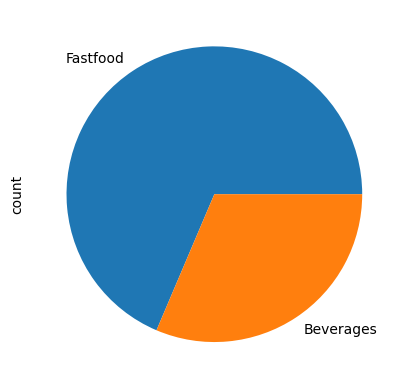

In [33]:
sales['item_type'].value_counts().plot(kind='pie')

<Axes: xlabel='item_type', ylabel='transaction_amount'>

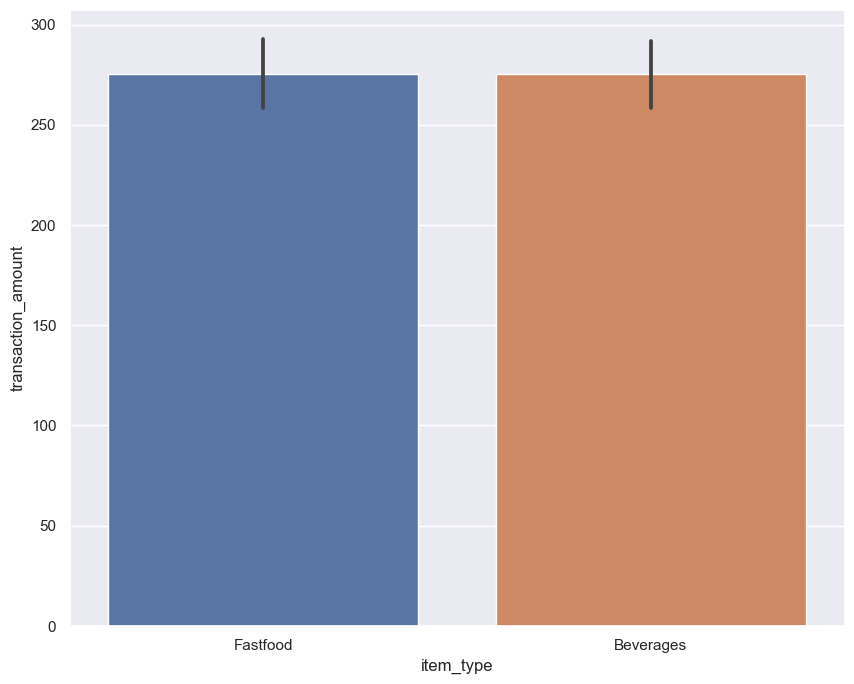

In [34]:
sns.set()
plt.figure(figsize=(10,8))
sns.barplot(data=sales,
           x=sales['item_type'],
           y=sales['transaction_amount'])

<Axes: xlabel='item_name', ylabel='transaction_amount'>

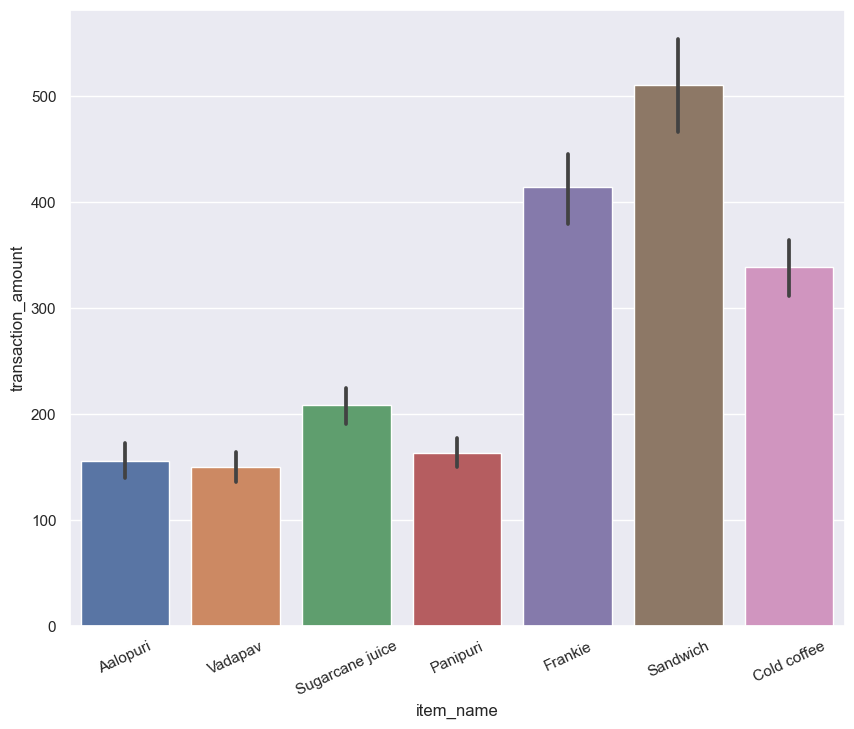

In [36]:
sns.set()
plt.figure(figsize=(10,8))
plt.xticks(rotation=25)
sns.barplot(data=sales,
           x=sales['item_name'],
           y=sales['transaction_amount'])

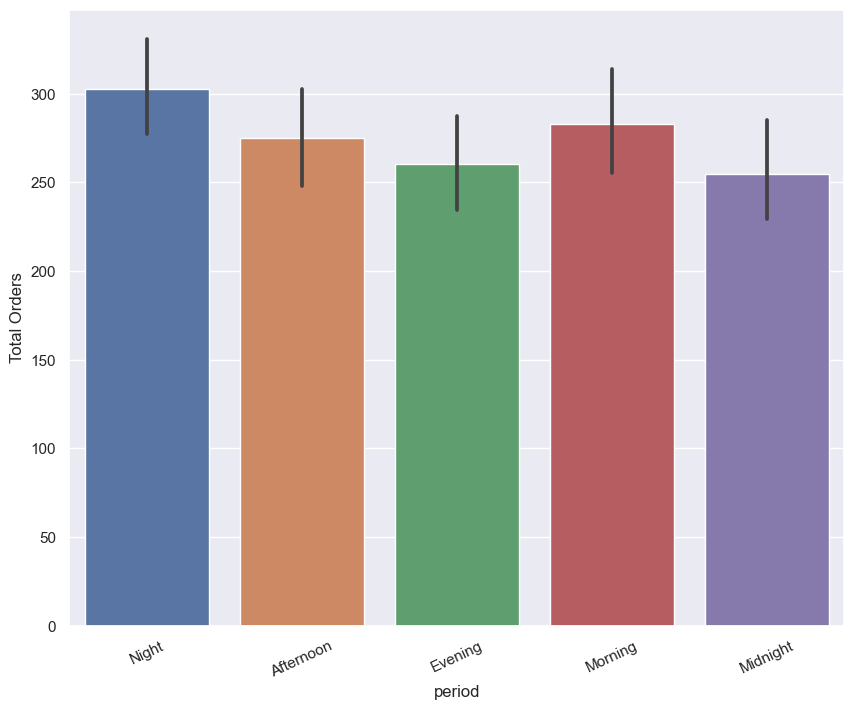

In [51]:
sns.set()
plt.figure(figsize=(10,8))
plt.xticks(rotation=25)
sns.barplot(data=sales,
           x='time_of_sale',
           y='transaction_amount')
plt.xlabel('period')
plt.ylabel('Total Orders')
plt.show()

In [39]:
sales.sample(2)

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
853,854,10/14/2022,Cold coffee,Beverages,40,14,560,Online,Mrs.,Night
261,262,03-05-2023,Vadapav,Fastfood,20,5,100,Cash,Mrs.,Evening


In [40]:
sales['transaction_type'].value_counts()

transaction_type
Cash      583
Online    417
Name: count, dtype: int64

<Axes: ylabel='count'>

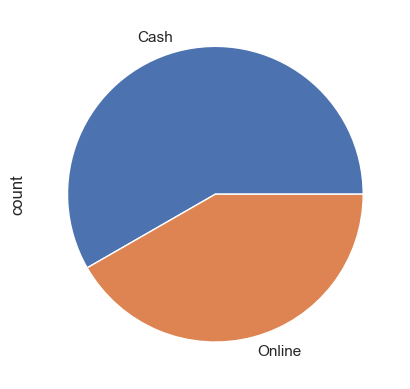

In [41]:
sales['transaction_type'].value_counts().plot(kind='pie')

In [56]:
sales['received_by'].replace('Mr.' ,'Male')
sales['received_by'].replace('Mrs.' ,'Female')

0         Mr.
1         Mr.
2         Mr.
3         Mr.
4         Mr.
        ...  
995    Female
996       Mr.
997       Mr.
998    Female
999    Female
Name: received_by, Length: 1000, dtype: object

In [58]:
sales['received_by']

0       Mr.
1       Mr.
2       Mr.
3       Mr.
4       Mr.
       ... 
995    Mrs.
996     Mr.
997     Mr.
998    Mrs.
999    Mrs.
Name: received_by, Length: 1000, dtype: object

In [57]:
sales['received_by'].value_counts()

received_by
Mr.     512
Mrs.    488
Name: count, dtype: int64

<Axes: xlabel='received_by', ylabel='count'>

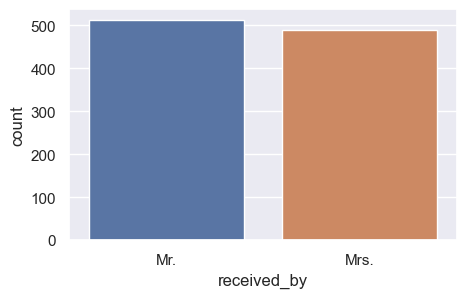

In [44]:
plt.figure(figsize = (5, 3))
sns.countplot(data = sales, x = 'received_by')